## <i>Data Preparation - Classification</i>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('KSI.csv')

In [3]:
df.head(3)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
0,-8829728.092,5419070.899,3389067,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),1
1,-8829728.092,5419070.899,3389068,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),2
2,-8829728.092,5419070.899,3389069,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),3


In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              16093 non-null  float64
 1   Y              16093 non-null  float64
 2   Index_         16093 non-null  int64  
 3   ACCNUM         16093 non-null  int64  
 4   YEAR           16093 non-null  int64  
 5   DATE           16093 non-null  object 
 6   TIME           16093 non-null  int64  
 7   HOUR           16093 non-null  int64  
 8   STREET1        16093 non-null  object 
 9   STREET2        14698 non-null  object 
 10  OFFSET         2388 non-null   object 
 11  ROAD_CLASS     15725 non-null  object 
 12  District       16080 non-null  object 
 13  WardNum        13795 non-null  float64
 14  Division       16093 non-null  int64  
 15  LATITUDE       16093 non-null  float64
 16  LONGITUDE      16093 non-null  float64
 17  LOCCOORD       15963 non-null  object 
 18  ACCLOC

<i>We see that there are a total of 55 columns in our dataset, with varying levels of sample size. While certain features would be useful (such as SPEEDING, REDLIGHT, ALCOHOL) the sample sizes are drastically smaller than other features in this dataset. For this reason, the research group has elected to omit these from the feature selection process.

We have identified that <b><font color = "red">INJURY TYPE</font></b> will be our target feature, as the business problem directly relates to investigating the factors determining what may constitute a serious or fatal injury.

<b><u>SHAPE</u></b>: We can see that the shape of our dataset is 16,093 rows and 56 columns. The features consist of 6 float types, 8 integer types, and 42 object types.</i> 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,16093.0,-8.838289e+06,1.158697e+04,-8.865305e+06,-8.846374e+06,-8.838364e+06,-8.829647e+06,-8.808254e+06
Y,16093.0,5.420851e+06,8.675426e+03,5.402526e+06,5.413383e+06,5.419648e+06,5.427921e+06,5.443099e+06
Index_,16093.0,3.252283e+07,3.594367e+07,3.363207e+06,5.332810e+06,7.423775e+06,8.050395e+07,8.140853e+07
ACCNUM,16093.0,2.296710e+09,3.253387e+09,1.284070e+05,1.069209e+06,1.290852e+06,5.001873e+09,9.085345e+09
YEAR,16093.0,2.011896e+03,4.010676e+00,2.006000e+03,2.008000e+03,2.012000e+03,2.015000e+03,2.019000e+03
TIME,16093.0,1.348327e+03,6.306883e+02,0.000000e+00,9.070000e+02,1.440000e+03,1.840000e+03,2.359000e+03
HOUR,16093.0,1.331088e+01,6.123885e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.800000e+01,2.300000e+01
WardNum,13795.0,1.209424e+01,7.283801e+00,1.000000e+00,6.000000e+00,1.100000e+01,1.900000e+01,2.500000e+01
Division,16093.0,3.422016e+01,1.454478e+01,1.100000e+01,2.200000e+01,3.300000e+01,4.300000e+01,5.500000e+01
LATITUDE,16093.0,4.371113e+01,5.632519e-02,4.359205e+01,4.366264e+01,4.370334e+01,4.375704e+01,4.385545e+01


<i>Unfortunately using the <b>.describe()</b> function is not useful at this stage as our features of interest are categorical in nature and therefore consists of string data.

### <i>Addressing Found Issues</i>

As illustrated in the Exploration phase, the following columns must employ feature reduction for the purposes of classification:

    ROAD_CLASS
    TRAFFCTRL
    VISIBILITY
    LIGHT
    RDSFCOND
    INVTYPE
    INVAGE
    INJURY
    VEHTYPE
    DRIVCOND

For data pruning purposes and to ensure our decision and random forest trees are manageable and practical, the group has elected to have no more than four classes per feature.

In [6]:
# First, let's duplicate the original df dataframe for classification so to ensure the main frame is intact.
df_class = df.copy()

In [7]:
df_class.head(3)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
0,-8829728.092,5419070.899,3389067,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),1
1,-8829728.092,5419070.899,3389068,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),2
2,-8829728.092,5419070.899,3389069,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),3


In [8]:
df_class.tail(3)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
16090,-8837083.082,5412746.086,81340413,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16091
16091,-8837083.082,5412746.086,81340414,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16092
16092,-8837083.082,5412746.086,81340415,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16093


<i>Great, all of our rows appear in our new classification dataframe. Now let's work on replacing our classes.</i>

#### <i>INJURY

The INJURY feature will be reduced from 5 classes to 2 classes; we will use binary numbers to make the 2 classes as follows:
    
    Label=0
        Consisting of:
            Fatal
            Major
    Label=1
        Consisting of:
            None
            Minor
            Minimal

In [9]:
# Creating a dictionary of replacement values
df_class['INJURY'].replace({'Fatal': 0, 'Major': 0, 'Minor': 1, 'Minimal': 1, 'None': 1})

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
16088    1.0
16089    0.0
16090    1.0
16091    1.0
16092    0.0
Name: INJURY, Length: 16093, dtype: float64

In [10]:
# Passing the dictionary of replacement values into the Series replace method
df_class['INJURY']=df_class['INJURY'].replace({'Fatal': 0, 'Major': 0, 'Minor': 1, 'Minimal': 1, 'None': 1})

In [11]:
print(df_class.groupby("INJURY").size())

INJURY
0.0    6156
1.0    8328
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [12]:
df_class['INJURY'].count()

14484

In [13]:
print(df.groupby("INJURY").size())

INJURY
Fatal       781
Major      5375
Minimal     996
Minor      1264
None       6068
dtype: int64


In [14]:
781+5375+996+1264+6068

14484

<i>Perfect! All records are included in our reclassification for INJURY.</i>

#### <i>ROAD_CLASS

The ROAD_CLASS feature will be reduced from 9 classes to 4 classes:
    
    Major Arterial
    Minor Arterial
    Collector
    Local_Other
        Consisting of:
            Local
            Other
            Pending
            Laneway
            Expressway
            Major Arterial Ramp

In [15]:
# Creating a dictionary of replacement values
df_class['ROAD_CLASS'].replace({'Local': 'Local_Other', 'Other': 'Local_Other', 'Pending': 'Local_Other', 'Laneway': 'Local_Other', 'Expressway': 'Local_Other', 'Major Arterial Ramp': 'Local_Other'})

0        Major Arterial
1        Major Arterial
2        Major Arterial
3        Major Arterial
4        Major Arterial
              ...      
16088    Major Arterial
16089    Major Arterial
16090    Major Arterial
16091    Major Arterial
16092    Major Arterial
Name: ROAD_CLASS, Length: 16093, dtype: object

In [16]:
# Passing the dictionary of replacement values into the Series replace method
df_class['ROAD_CLASS'] = df_class['ROAD_CLASS'].replace({'Local': 'Local_Other', 'Other': 'Local_Other', 'Pending': 'Local_Other', 'Laneway': 'Local_Other', 'Expressway': 'Local_Other', 'Major Arterial Ramp': 'Local_Other'})

In [17]:
print(df_class.groupby("ROAD_CLASS").size())

ROAD_CLASS
Collector           900
Local_Other         808
Major Arterial    11555
Minor Arterial     2462
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [18]:
900+808+11555+2462

15725

In [19]:
print(df.groupby("ROAD_CLASS").size())

ROAD_CLASS
Collector                900
Expressway                24
Laneway                   10
Local                    727
Major Arterial         11555
Major Arterial Ramp        1
Minor Arterial          2462
Other                     33
Pending                   13
dtype: int64


In [20]:
900+24+10+727+11555+1+2462+33+13

15725

<i>Perfect! All records are included in our reclassification for ROAD_CLASS.</i>

#### <i>TRAFFCTL

The TRAFFCTL (Traffic Control) feature will be reduced from 11 classes to 4 classes:
    
    No Control
    Traffic Signal
    Stop Sign
    Other
        Consisting of:
            Pedestrian Crossover
            Traffic Controller
            Yield Sign
            School Guard
            Police Control
            Traffic Gate
            Streetcar (Stop for)
            PXO - No Ped

In [21]:
# Creating a dictionary of replacement values
df_class['TRAFFCTL'].replace({'Pedestrian Crossover': 'Other', 'Traffic Controller': 'Other', 'Yield Sign': 'Other', 'School Guard': 'Other', 'Police Control': 'Other', 'Traffic Gate': 'Other', 'Streetcar (Stop for)': 'Other', 'PXO - No Ped': 'Other'})

0            No Control
1            No Control
2            No Control
3            No Control
4            No Control
              ...      
16088        No Control
16089        No Control
16090    Traffic Signal
16091    Traffic Signal
16092    Traffic Signal
Name: TRAFFCTL, Length: 16093, dtype: object

In [22]:
# Passing the dictionary of replacement values into the Series replace method
df_class['TRAFFCTL']=df_class['TRAFFCTL'].replace({'Pedestrian Crossover': 'Other', 'Traffic Controller': 'Other', 'Yield Sign': 'Other', 'School Guard': 'Other', 'Police Control': 'Other', 'Traffic Gate': 'Other', 'Streetcar (Stop for)': 'Other', 'PXO - No Ped': 'Other'})

In [23]:
print(df_class.groupby("TRAFFCTL").size())

TRAFFCTL
No Control        7692
Other              329
Stop Sign         1272
Traffic Signal    6771
dtype: int64


<i>The majority of our categories are reclassified, however the class 'Streetcar (Stop for)' didn't reclassify with the others. Let's address this again.</i>

In [24]:
# Creating a second dictionary of replacement values to reclassify 'Streetcar (Stop for)'
df_class['TRAFFCTL'].replace({'Streetcar (Stop for)': 'Other'})

0            No Control
1            No Control
2            No Control
3            No Control
4            No Control
              ...      
16088        No Control
16089        No Control
16090    Traffic Signal
16091    Traffic Signal
16092    Traffic Signal
Name: TRAFFCTL, Length: 16093, dtype: object

In [25]:
# Passing the dictionary of replacement values into the Series replace method
df_class['TRAFFCTL']=df_class['TRAFFCTL'].replace({'Streetcar (Stop for)': 'Other'})

In [26]:
print(df_class.groupby("TRAFFCTL").size())

TRAFFCTL
No Control        7692
Other              329
Stop Sign         1272
Traffic Signal    6771
dtype: int64


<i>That worked and our feature is now fully reclassified. Let's make sure it contains the same amount of rows.</i>

In [27]:
7692+329+1272+6771

16064

In [28]:
print(df.groupby("TRAFFCTL").size())

TRAFFCTL
No Control              7692
PXO - No Ped               2
Pedestrian Crossover     189
Police Control             2
School Guard               2
Stop Sign               1272
Streetcar (Stop for)      16
Traffic Controller       100
Traffic Gate               5
Traffic Signal          6771
Yield Sign                13
dtype: int64


In [29]:
7692+2+189+2+2+1272+16+100+5+6771+13

16064

<i>Perfect! All records are included in our reclassification for TRAFFCTL.</i>

#### <i>VISIBILITY

The VISIBILITY feature will be reduced from 8 classes to 4 classes:
    
    Clear
    Snow
    Rain
    Other
        Consisting Of:
            Other
            Strong wind
            Fog, Mist, Smoke, Dust
            Drifting Snow
            Freezing Rain

In [30]:
# Creating a dictionary of replacement values
df_class['VISIBILITY'].replace({'Strong wind': 'Other', 'Fog, Mist, Smoke, Dust': 'Other', 'Drifting Snow': 'Other', 'Freezing Rain': 'Other'})

0        Clear
1        Clear
2        Clear
3        Clear
4        Clear
         ...  
16088    Clear
16089    Clear
16090    Clear
16091    Clear
16092    Clear
Name: VISIBILITY, Length: 16093, dtype: object

In [31]:
# Passing the dictionary of replacement values into the Series replace method
df_class['VISIBILITY']=df_class['VISIBILITY'].replace({'Strong wind': 'Other', 'Fog, Mist, Smoke, Dust': 'Other', 'Drifting Snow': 'Other', 'Freezing Rain': 'Other'})

In [32]:
print(df_class.groupby("VISIBILITY").size())

VISIBILITY
Clear    13814
Other      213
Rain      1711
Snow       333
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [33]:
13814+213+1711+333

16071

In [34]:
print(df.groupby("VISIBILITY").size())

VISIBILITY
Clear                     13814
Drifting Snow                19
Fog, Mist, Smoke, Dust       44
Freezing Rain                43
Other                        99
Rain                       1711
Snow                        333
Strong wind                   8
dtype: int64


In [35]:
13814+19+44+43+99+1711+333+8

16071

<i>Perfect! All records are included in our reclassification for VISIBILITY.</i>

#### <i>LIGHT

The LIGHT feature will be reduced from 9 classes to 3 classes:
    
    Dark
        Consisting Of:
            Dark
            Dark, artificial
    Dusk_Dawn
        Consisting Of:
            Dusk
            Dusk, artificial
            Dawn
            Dawn, artificial
            Other
    Daylight
        Consisting Of:
            Daylight
            Daylight, artificial

In [36]:
# Creating a dictionary of replacement values
df_class['LIGHT'].replace({'Dark, artificial': 'Dark', 'Dusk': 'Dusk_Dawn', 'Dusk, artificial': 'Dusk_Dawn', 'Dawn, artificial': 'Dusk_Dawn', 'Other': 'Dusk_Dawn', 'Daylight, artificial': 'Daylight'})

0            Dark
1            Dark
2            Dark
3            Dark
4            Dark
           ...   
16088        Dark
16089        Dark
16090    Daylight
16091    Daylight
16092    Daylight
Name: LIGHT, Length: 16093, dtype: object

In [37]:
# Passing the dictionary of replacement values into the Series replace method
df_class['LIGHT']=df_class['LIGHT'].replace({'Dark, artificial': 'Dark', 'Dusk': 'Dusk_Dawn', 'Dusk, artificial': 'Dusk_Dawn', 'Dawn, artificial': 'Dusk_Dawn', 'Other': 'Dusk_Dawn', 'Daylight, artificial': 'Daylight'})

In [38]:
print(df_class.groupby("LIGHT").size())

LIGHT
Dark         6134
Dawn          102
Daylight     9379
Dusk_Dawn     478
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [39]:
6134+102+9379+478

16093

In [40]:
print(df.groupby("LIGHT").size())

LIGHT
Dark                    3525
Dark, artificial        2609
Dawn                     102
Dawn, artificial          85
Daylight                9255
Daylight, artificial     124
Dusk                     221
Dusk, artificial         166
Other                      6
dtype: int64


In [41]:
3525+2609+102+85+9255+124+221+166+6

16093

<i>Perfect! All records are included in our reclassification for LIGHT.</i>

#### <i>RDSFCOND

The RDSFCOND (Road Surface Condition) feature will be reduced from 9 classes to 4 classes:
    
    Wet
    Dry
    Other
        Consisting Of:
            Other
            Spilled liquid
            Loose Sand or Gravel
    Winter Conditions
        Consisting Of:
            Ice
            Slush
            Loose Snow
            Packed Snow

In [42]:
# Creating a dictionary of replacement values
df_class['RDSFCOND'].replace({'Spilled liquid': 'Other', 'Loose Sand or Gravel': 'Other', 'Ice': 'Winter Conditions', 'Slush': 'Winter Conditions', 'Loose Snow': 'Winter Conditions', 'Packed Snow': 'Winter Conditions'})

0        Wet
1        Wet
2        Wet
3        Wet
4        Wet
        ... 
16088    Dry
16089    Dry
16090    Dry
16091    Dry
16092    Dry
Name: RDSFCOND, Length: 16093, dtype: object

In [43]:
# Passing the dictionary of replacement values into the Series replace method
df_class['RDSFCOND']=df_class['RDSFCOND'].replace({'Spilled liquid': 'Other', 'Loose Sand or Gravel': 'Other', 'Ice': 'Winter Conditions', 'Slush': 'Winter Conditions', 'Loose Snow': 'Winter Conditions', 'Packed Snow': 'Winter Conditions'})

In [44]:
print(df_class.groupby("RDSFCOND").size())

RDSFCOND
Dry                  12820
Other                  155
Wet                   2718
Winter Conditions      373
dtype: int64


<i>Looks like it didn't pick up 'Spilled Liquid', and there was a typo in the reclassification for 'Winter Conditions'. Let's re-address.</i>

In [45]:
# Creating a dictionary of replacement values
df_class['RDSFCOND'].replace({'Spilled liquid': 'Other', 'Winter Conditionst': 'Winter Conditions'})

0        Wet
1        Wet
2        Wet
3        Wet
4        Wet
        ... 
16088    Dry
16089    Dry
16090    Dry
16091    Dry
16092    Dry
Name: RDSFCOND, Length: 16093, dtype: object

In [46]:
# Passing the dictionary of replacement values into the Series replace method
df_class['RDSFCOND']=df_class['RDSFCOND'].replace({'Spilled liquid': 'Other', 'Winter Conditionst': 'Winter Conditions'})

In [47]:
print(df_class.groupby("RDSFCOND").size())

RDSFCOND
Dry                  12820
Other                  155
Wet                   2718
Winter Conditions      373
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [48]:
12820+155+2718+373

16066

In [49]:
print(df.groupby("RDSFCOND").size())

RDSFCOND
Dry                     12820
Ice                        73
Loose Sand or Gravel        7
Loose Snow                162
Other                     147
Packed Snow                42
Slush                      96
Spilled liquid              1
Wet                      2718
dtype: int64


In [50]:
12820+73+7+162+147+42+96+1+2718

16066

<i>Perfect! All records are included in our reclassification for RDSFCOND.</i>

#### <i>INVTYPE

The INVTYPE (Involvement Type) feature will be reduced from 18 classes to 4 classes:
    
    4 Wheel Occupants
        Consisting Of:
            Passenger
            Driver
            Vehicle Owner
            Truck Driver
            Driver - Not Hit
            Trailer Owner
    2 Wheel Occupants
        Consisting Of:
            Motorcycle Driver
            Cyclist
            Motorcycle Passenger
            Moped Driver
            Cyclist Passenger
    Pedestrians
        Consisting Of:
            Pedestrian
            In-Line Skater
            Wheelchair
            Pedestrian - Not Hit
    Other
        Consisting Of:
            Other Property Owner
            Other
            Witness
    
Because of the size of the reclassification, let's break it down to each new class.

In [51]:
# Creating a dictionary of replacement values for the '4 Wheel Occupants' class
df_class['INVTYPE'].replace({'Passenger': '4 Wheel Occupants', 'Driver': '4 Wheel Occupants', 'Vehicle Owner': '4 Wheel Occupants', 'Truck Driver': '4 Wheel Occupants', 'Driver - Not Hit': '4 Wheel Occupants', 'Trailer Owner': '4 Wheel Occupants'})

0        4 Wheel Occupants
1        4 Wheel Occupants
2        4 Wheel Occupants
3        4 Wheel Occupants
4        4 Wheel Occupants
               ...        
16088    4 Wheel Occupants
16089           Pedestrian
16090    4 Wheel Occupants
16091    4 Wheel Occupants
16092           Pedestrian
Name: INVTYPE, Length: 16093, dtype: object

In [52]:
# Passing the dictionary of replacement values into the Series replace method - '4 Wheel Occupants'
df_class['INVTYPE']=df_class['INVTYPE'].replace({'Passenger': '4 Wheel Occupants', 'Driver': '4 Wheel Occupants', 'Vehicle Owner': '4 Wheel Occupants', 'Truck Driver': '4 Wheel Occupants', 'Driver - Not Hit': '4 Wheel Occupants', 'Trailer Owner': '4 Wheel Occupants'})

In [53]:
# Creating a dictionary of replacement values for the '2 Wheel Occupants' class
df_class['INVTYPE'].replace({'Motorcycle Passenger': '2 Wheel Occupants', 'Motorcycle Driver': '2 Wheel Occupants', 'Moped Driver': '2 Wheel Occupants', 'Cyclist': '2 Wheel Occupants', 'Cyclist Passenger': '2 Wheel Occupants'})

0        4 Wheel Occupants
1        4 Wheel Occupants
2        4 Wheel Occupants
3        4 Wheel Occupants
4        4 Wheel Occupants
               ...        
16088    4 Wheel Occupants
16089           Pedestrian
16090    4 Wheel Occupants
16091    4 Wheel Occupants
16092           Pedestrian
Name: INVTYPE, Length: 16093, dtype: object

In [54]:
# Passing the dictionary of replacement values into the Series replace method - '2 Wheel Occupants'
df_class['INVTYPE']=df_class['INVTYPE'].replace({'Motorcycle Passenger': '2 Wheel Occupants', 'Motorcycle Driver': '2 Wheel Occupants', 'Moped Driver': '2 Wheel Occupants', 'Cyclist': '2 Wheel Occupants', 'Cyclist Passenger': '2 Wheel Occupants'})

In [55]:
# Creating a dictionary of replacement values for the 'Pedestrians' class

df_class['INVTYPE'].replace({'Pedestrian': 'Pedestrians', 'In-Line Skater': 'Pedestrians', 'Wheelchair': 'Pedestrians', 'Pedestrian - Not Hit': 'Pedestrians'})

0        4 Wheel Occupants
1        4 Wheel Occupants
2        4 Wheel Occupants
3        4 Wheel Occupants
4        4 Wheel Occupants
               ...        
16088    4 Wheel Occupants
16089          Pedestrians
16090    4 Wheel Occupants
16091    4 Wheel Occupants
16092          Pedestrians
Name: INVTYPE, Length: 16093, dtype: object

In [56]:
# Passing the dictionary of replacement values into the Series replace method - 'Pedestrians'
df_class['INVTYPE']=df_class['INVTYPE'].replace({'Pedestrian': 'Pedestrians', 'In-Line Skater': 'Pedestrians', 'Wheelchair': 'Pedestrians', 'Pedestrian - Not Hit': 'Pedestrians'})

In [57]:
# Creating a dictionary of replacement values for the 'Other' class
df_class['INVTYPE'].replace({'Other Property Owner': 'Other', 'Witness': 'Other'})

0        4 Wheel Occupants
1        4 Wheel Occupants
2        4 Wheel Occupants
3        4 Wheel Occupants
4        4 Wheel Occupants
               ...        
16088    4 Wheel Occupants
16089          Pedestrians
16090    4 Wheel Occupants
16091    4 Wheel Occupants
16092          Pedestrians
Name: INVTYPE, Length: 16093, dtype: object

In [58]:
# Passing the dictionary of replacement values into the Series replace method - 'Other'
df_class['INVTYPE']=df_class['INVTYPE'].replace({'Other Property Owner': 'Other', 'Witness': 'Other'})

In [59]:
print(df_class.groupby("INVTYPE").size())

INVTYPE
2 Wheel Occupants     1294
4 Wheel Occupants    11640
Other                  415
Pedestrians           2734
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [60]:
1294+11640+415+2734

16083

In [61]:
print(df.groupby("INVTYPE").size())

INVTYPE
Cyclist                  684
Cyclist Passenger          2
Driver                  7263
Driver - Not Hit          16
In-Line Skater             5
Moped Driver              27
Motorcycle Driver        551
Motorcycle Passenger      30
Other                    157
Other Property Owner     257
Passenger               2426
Pedestrian              2715
Pedestrian - Not Hit       1
Trailer Owner              2
Truck Driver             297
Vehicle Owner           1636
Wheelchair                13
Witness                    1
dtype: int64


In [62]:
(7263+16+2426+297+1636)+(684+2+27+551+30)+(5+2715+1+13)+(157+257+2+1)

16083

<i>Perfect! All records are included in our reclassification for INVTYPE.</i>

#### <i>INVAGE

The INVAGE (Involved Age) feature will be reduced from 21 classes to 5 classes as we must address the substantial amount of unknown ages, as well as adequately aggregate the age groups based on key findings during the exploration phase:
    
    0 to 19
        Consisting of:
            0 to 4
            5 to 9
            10 to 14
            15 to 19
    20 to 39
        Consisting of:
            20 to 24
            25 to 29
            30 to 34
            35 to 39
    40 to 59
        Consisting of:
            40 to 44
            45 to 49
            50 to 54
            55 to 59
    60 and older
        Consisting of:
            60 to 64
            65 to 69
            70 to 74
            75 to 79
            80 to 84
            85 to 89
            90 to 94
            Over 95
    Unknown
    
Because of the size of the reclassification, let's break it down to each new class.

In [63]:
# Creating a dictionary of replacement values for the '0 to 19' class
df_class['INVAGE'].replace({'0 to 4': '0 to 19', '5 to 9': '0 to 19', '10 to 14': '0 to 19', '15 to 19': '0 to 19'})

0        50 to 54
1         0 to 19
2        55 to 59
3        20 to 24
4         0 to 19
           ...   
16088    20 to 24
16089     0 to 19
16090    50 to 54
16091    25 to 29
16092    25 to 29
Name: INVAGE, Length: 16093, dtype: object

In [64]:
# Passing the dictionary of replacement values into the Series replace method - '0 to 19'
df_class['INVAGE']=df_class['INVAGE'].replace({'0 to 4': '0 to 19', '5 to 9': '0 to 19', '10 to 14': '0 to 19', '15 to 19': '0 to 19'})

In [65]:
# Creating a dictionary of replacement values for the '20 to 39' class
df_class['INVAGE'].replace({'20 to 24': '20 to 39', '25 to 29': '20 to 39', '30 to 34': '20 to 39', '35 to 39': '20 to 39'})

0        50 to 54
1         0 to 19
2        55 to 59
3        20 to 39
4         0 to 19
           ...   
16088    20 to 39
16089     0 to 19
16090    50 to 54
16091    20 to 39
16092    20 to 39
Name: INVAGE, Length: 16093, dtype: object

In [66]:
# Passing the dictionary of replacement values into the Series replace method - '20 to 39'
df_class['INVAGE']=df_class['INVAGE'].replace({'20 to 24': '20 to 39', '25 to 29': '20 to 39', '30 to 34': '20 to 39', '35 to 39': '20 to 39'})

In [67]:
# Creating a dictionary of replacement values for the '40 to 59' class
df_class['INVAGE'].replace({'40 to 44': '40 to 59', '45 to 49': '40 to 59', '50 to 54': '40 to 59', '55 to 59': '40 to 59'})

0        40 to 59
1         0 to 19
2        40 to 59
3        20 to 39
4         0 to 19
           ...   
16088    20 to 39
16089     0 to 19
16090    40 to 59
16091    20 to 39
16092    20 to 39
Name: INVAGE, Length: 16093, dtype: object

In [68]:
# Passing the dictionary of replacement values into the Series replace method - '40 to 59'
df_class['INVAGE']=df_class['INVAGE'].replace({'40 to 44': '40 to 59', '45 to 49': '40 to 59', '50 to 54': '40 to 59', '55 to 59': '40 to 59'})

In [69]:
# Creating a dictionary of replacement values for the '60 and older' class
df_class['INVAGE'].replace({'60 to 64': '60 and older', '65 to 69': '60 and older', '70 to 74': '60 and older', '75 to 79': '60 and older', '80 to 84': '60 and older', '85 to 89': '60 and older', '90 to 94': '60 and older', 'Over 95': '60 and older'})

0        40 to 59
1         0 to 19
2        40 to 59
3        20 to 39
4         0 to 19
           ...   
16088    20 to 39
16089     0 to 19
16090    40 to 59
16091    20 to 39
16092    20 to 39
Name: INVAGE, Length: 16093, dtype: object

In [70]:
# Passing the dictionary of replacement values into the Series replace method - '60 and older'
df_class['INVAGE']=df_class['INVAGE'].replace({'60 to 64': '60 and older', '65 to 69': '60 and older', '70 to 74': '60 and older', '75 to 79': '60 and older', '80 to 84': '60 and older', '85 to 89': '60 and older', '90 to 94': '60 and older', 'Over 95': '60 and older'})

In [71]:
print(df_class.groupby("INVAGE").size())

INVAGE
0 to 19         1283
20 to 39        5211
40 to 59        4325
60 and older    2733
unknown         2541
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [72]:
1283+5211+4325+2733+2541

16093

In [73]:
print(df.groupby("INVAGE").size())

INVAGE
0 to 4       156
10 to 14     214
15 to 19     738
20 to 24    1484
25 to 29    1417
30 to 34    1174
35 to 39    1136
40 to 44    1134
45 to 49    1104
5 to 9       175
50 to 54    1150
55 to 59     937
60 to 64     743
65 to 69     586
70 to 74     463
75 to 79     390
80 to 84     292
85 to 89     191
90 to 94      54
Over 95       14
unknown     2541
dtype: int64


In [74]:
156+214+738+1484+1417+1174+1136+1134+1104+175+1150+937+743+586+463+390+292+191+54+14+2541

16093

<i>Perfect! All records are included in our reclassification for INVAGE.</i>

#### <i>VEHTYPE

The VEHTYPE (Vehicle Type) feature will be reduced from 28 classes to 4 classes:
    
    Small
        Consisting Of:
            Automobile, Station Wagon
            Taxi
            Passenger Van
            Pick Up Truck
            Police Vehicle
    Med_Hvy
        Consisting Of:
            Truck - Open
            Truck - Dump
            Truck - Closed (Blazer, etc)
            Tow Truck
            Truck - Tank
            Truck-Tractor
            Fire Vehicle
            Truck - Car Carrier
            Delivery Van, Street Car
            Intercity Bus
            Bus (Other) (Go Bus, Gray Coach)
            Municipal Transit Bus (TTC)
            School Bus
            Construction Equipment

    2 Wheels
        Consisting Of:
            Bicycle
            Motorcycle
            Moped
            Off Road - 2 Wheels
    Other
        Consisting Of:
            Other
            Truck (other)
            Other Emergency Vehicle

Because of the size of the reclassification, let's break it down to each new class.

In [75]:
# Creating a dictionary of replacement values for the 'Small' class
df_class['VEHTYPE'].replace({'Automobile, Station Wagon': 'Small', 'Taxi': 'Small', 'Passenger Van': 'Small', 'Pick Up Truck': 'Small', 'Police Vehicle': 'Small'})

0          NaN
1          NaN
2        Small
3          NaN
4          NaN
         ...  
16088    Small
16089      NaN
16090    Small
16091    Small
16092      NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [76]:
# Passing the dictionary of replacement values into the Series replace method - 'Small'
df_class['VEHTYPE'].replace({'Automobile, Station Wagon': 'Small', 'Taxi': 'Small', 'Passenger Van': 'Small', 'Pick Up Truck': 'Small', 'Police Vehicle': 'Small'})

0          NaN
1          NaN
2        Small
3          NaN
4          NaN
         ...  
16088    Small
16089      NaN
16090    Small
16091    Small
16092      NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [77]:
# Creating a dictionary of replacement values for the 'Med_Hvy' class
df_class['VEHTYPE'].replace({'Truck - Open': 'Med_Hvy', 'Truck - Dump': 'Med_Hvy', 'Truck - Closed (Blazer, etc)': 'Med_Hvy', 'Tow Truck': 'Med_Hvy', 'Truck - Tank': 'Med_Hvy', 'Truck-Tractor': 'Med_Hvy', 'Fire Vehicle': 'Med_Hvy', 'Truck - Car Carrier': 'Med_Hvy', 'Delivery Van': 'Med_Hvy', 'Street Car': 'Med_Hvy', 'Intercity Bus': 'Med_Hvy', 'Bus (Other) (Go Bus, Gray Coach)': 'Med_Hvy', 'Municipal Transit Bus (TTC)': 'Med_Hvy', 'School Bus': 'Med_Hvy', 'Construction Equipment': 'Med_Hvy'})

0                              NaN
1                              NaN
2        Automobile, Station Wagon
3                              NaN
4                              NaN
                   ...            
16088    Automobile, Station Wagon
16089                          NaN
16090    Automobile, Station Wagon
16091    Automobile, Station Wagon
16092                          NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [78]:
# Passing the dictionary of replacement values into the Series replace method - 'Med_Hvy'
df_class['VEHTYPE']=df_class['VEHTYPE'].replace({'Truck - Open': 'Med_Hvy', 'Truck - Dump': 'Med_Hvy', 'Truck - Closed (Blazer, etc)': 'Med_Hvy', 'Tow Truck': 'Med_Hvy', 'Truck - Tank': 'Med_Hvy', 'Truck-Tractor': 'Med_Hvy', 'Fire Vehicle': 'Med_Hvy', 'Truck - Car Carrier': 'Med_Hvy', 'Delivery Van': 'Med_Hvy', 'Street Car': 'Med_Hvy', 'Intercity Bus': 'Med_Hvy', 'Bus (Other) (Go Bus, Gray Coach)': 'Med_Hvy', 'Municipal Transit Bus (TTC)': 'Med_Hvy', 'School Bus': 'Med_Hvy', 'Construction Equipment': 'Med_Hvy'})

In [79]:
# Creating a dictionary of replacement values for the '2 Wheels' class
df_class['VEHTYPE'].replace({'Bicycle': '2 Wheels', 'Motorcycle': '2 Wheels', 'Moped': '2 Wheels', 'Off Road - 2 Wheels': '2 Wheels'})

0                              NaN
1                              NaN
2        Automobile, Station Wagon
3                              NaN
4                              NaN
                   ...            
16088    Automobile, Station Wagon
16089                          NaN
16090    Automobile, Station Wagon
16091    Automobile, Station Wagon
16092                          NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [80]:
# Passing the dictionary of replacement values into the Series replace method - '2 Wheels'
df_class['VEHTYPE']=df_class['VEHTYPE'].replace({'Bicycle': '2 Wheels', 'Motorcycle': '2 Wheels', 'Moped': '2 Wheels', 'Off Road - 2 Wheels': '2 Wheels'})

In [81]:
# Creating a dictionary of replacement values for the 'Other' class
df_class['VEHTYPE'].replace({'Truck (other)': 'Other', 'Other Emergency Vehicle': 'Other'})

0                              NaN
1                              NaN
2        Automobile, Station Wagon
3                              NaN
4                              NaN
                   ...            
16088    Automobile, Station Wagon
16089                          NaN
16090    Automobile, Station Wagon
16091    Automobile, Station Wagon
16092                          NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [82]:
# Passing the dictionary of replacement values into the Series replace method - 'Other'
df_class['VEHTYPE']=df_class['VEHTYPE'].replace({'Truck (other)': 'Other', 'Other Emergency Vehicle': 'Other'})

In [83]:
print(df_class.groupby("VEHTYPE").size())

VEHTYPE
2 Wheels                     1254
Automobile, Station Wagon    6594
Med_Hvy                       671
Other                        4758
Passenger Van                 105
Pick Up Truck                 152
Police Vehicle                  4
Taxi                           28
dtype: int64


<i>For some reason it didn't pick up the 'Small' vehicles. Let's try and reclassify.

In [84]:
# Creating a dictionary of replacement values for the 'Small' class
df_class['VEHTYPE'].replace({'Automobile, Station Wagon': 'Small', 'Passenger Van': 'Small', 'Pick Up Truck': 'Small', 'Police Vehicle': 'Small', 'Taxi': 'Small'})

0          NaN
1          NaN
2        Small
3          NaN
4          NaN
         ...  
16088    Small
16089      NaN
16090    Small
16091    Small
16092      NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [85]:
# Passing the dictionary of replacement values into the Series replace method - 'Small'
df_class['VEHTYPE']=df_class['VEHTYPE'].replace({'Automobile, Station Wagon': 'Small', 'Passenger Van': 'Small', 'Pick Up Truck': 'Small', 'Police Vehicle': 'Small', 'Taxi': 'Small'})

In [86]:
print(df_class.groupby("VEHTYPE").size())

VEHTYPE
2 Wheels    1254
Med_Hvy      671
Other       4758
Small       6883
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [87]:
1254+671+4758+6883

13566

In [88]:
print(df.groupby("VEHTYPE").size())

VEHTYPE
Automobile, Station Wagon           6594
Bicycle                              680
Bus (Other) (Go Bus, Gray Coach)      11
Construction Equipment                 4
Delivery Van                          63
Fire Vehicle                           3
Intercity Bus                          9
Moped                                 22
Motorcycle                           551
Municipal Transit Bus (TTC)          241
Off Road - 2 Wheels                    1
Other                               4745
Other Emergency Vehicle                1
Passenger Van                        105
Pick Up Truck                        152
Police Vehicle                         4
School Bus                             4
Street Car                            39
Taxi                                  28
Tow Truck                              4
Truck (other)                         12
Truck - Car Carrier                    1
Truck - Closed (Blazer, etc)          50
Truck - Dump                          32
Truck - 

In [89]:
6594+680+11+4+63+3+9+22+551+241+1+4745+1+105+152+4+4+39+28+4+12+1+50+32+173+7+30

13566

<i>Perfect! All records are included in our reclassification for VEHTYPE.</i>

#### <i>DRIVCOND

The DRIVCOND (Driver Condition) feature will be reduced from 10 classes to 4 classes:
    
    Normal
    Inattentive
    Impaired
        Consisting Of:
            Had Been Drinking
            Ability Impaired, Alcohol
            Ability Impaired, Alcohol Over .08
            Ability Impaired, Drugs
            Fatigue
            Medical or Physical Disability
    Other
        Consisting Of:
            Other
            Unknown

In [90]:
# Creating a dictionary of replacement values 
df_class['DRIVCOND'].replace({'Had Been Drinking': 'Impaired', 'Ability Impaired, Alcohol': 'Impaired', 'Ability Impaired, Alcohol Over .08': 'Impaired', 'Ability Impaired, Drugs': 'Impaired', 'Fatigue': 'Impaired', 'Medical or Physical Disability': 'Impaired', 'Unknown': 'Other'})

0                NaN
1                NaN
2             Normal
3                NaN
4                NaN
            ...     
16088         Normal
16089            NaN
16090    Inattentive
16091         Normal
16092            NaN
Name: DRIVCOND, Length: 16093, dtype: object

In [91]:
# Passing the dictionary of replacement values into the Series replace method - 'Small'
df_class['DRIVCOND']=df_class['DRIVCOND'].replace({'Had Been Drinking': 'Impaired', 'Ability Impaired, Alcohol': 'Impaired', 'Ability Impaired, Alcohol Over .08': 'Impaired', 'Ability Impaired, Drugs': 'Impaired', 'Fatigue': 'Impaired', 'Medical or Physical Disability': 'Impaired', 'Unknown': 'Other'})

In [92]:
print(df_class.groupby("DRIVCOND").size())

DRIVCOND
Impaired        586
Inattentive    1318
Normal         5167
Other           961
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [93]:
586+1318+5167+961

8032

In [94]:
print(df.groupby("DRIVCOND").size())

DRIVCOND
Ability Impaired, Alcohol              106
Ability Impaired, Alcohol Over .08     115
Ability Impaired, Drugs                 16
Fatigue                                 47
Had Been Drinking                      146
Inattentive                           1318
Medical or Physical Disability         156
Normal                                5167
Other                                   41
Unknown                                920
dtype: int64


In [95]:
106+115+16+47+146+1318+156+5167+41+920

8032

<i>Perfect! All records are included in our reclassification for VEHTYPE.</i>

Our features have been engineered and reduced. Now let's address the missing values.

## <u>Missing Values</u>

Variables to highlight in dataset for prediction:

    ROAD_CLASS
    WardNum
    Division
    TRAFFCTL
    VISIBILITY
    LIGHT
    RDSFCOND
    INVTYPE
    INVAGE
    INJURY
    VEHTYPE
    DRIVCOND

In [96]:
df_class.ROAD_CLASS.value_counts(dropna=False)

Major Arterial    11555
Minor Arterial     2462
Collector           900
Local_Other         808
NaN                 368
Name: ROAD_CLASS, dtype: int64

In [97]:
df_class.WardNum.value_counts(dropna=False)

NaN     2298
10.0     930
1.0      867
3.0      740
11.0     738
5.0      719
14.0     712
4.0      639
21.0     630
13.0     618
9.0      607
22.0     563
23.0     558
6.0      544
7.0      505
20.0     486
18.0     459
24.0     438
2.0      437
25.0     423
8.0      421
19.0     409
17.0     388
16.0     373
12.0     347
15.0     244
Name: WardNum, dtype: int64

In [98]:
df_class.Division.value_counts(dropna=False)

42    1612
32    1237
41    1218
23    1200
14    1088
22    1020
43    1004
53     902
31     853
52     852
51     845
33     839
12     807
54     706
11     670
13     659
55     581
Name: Division, dtype: int64

In [99]:
df_class.TRAFFCTL.value_counts(dropna=False)

No Control        7692
Traffic Signal    6771
Stop Sign         1272
Other              329
NaN                 29
Name: TRAFFCTL, dtype: int64

In [100]:
df_class.VISIBILITY.value_counts(dropna=False)

Clear    13814
Rain      1711
Snow       333
Other      213
NaN         22
Name: VISIBILITY, dtype: int64

In [101]:
df_class.LIGHT.value_counts(dropna=False)

Daylight     9379
Dark         6134
Dusk_Dawn     478
Dawn          102
Name: LIGHT, dtype: int64

In [102]:
df_class.RDSFCOND.value_counts(dropna=False)

Dry                  12820
Wet                   2718
Winter Conditions      373
Other                  155
NaN                     27
Name: RDSFCOND, dtype: int64

In [103]:
df_class.INVTYPE.value_counts(dropna=False)

4 Wheel Occupants    11640
Pedestrians           2734
2 Wheel Occupants     1294
Other                  415
NaN                     10
Name: INVTYPE, dtype: int64

In [104]:
df_class.INVAGE.value_counts(dropna=False)

20 to 39        5211
40 to 59        4325
60 and older    2733
unknown         2541
0 to 19         1283
Name: INVAGE, dtype: int64

In [105]:
df_class.INJURY.value_counts(dropna=False)

1.0    8328
0.0    6156
NaN    1609
Name: INJURY, dtype: int64

In [106]:
df_class.VEHTYPE.value_counts(dropna=False)

Small       6883
Other       4758
NaN         2527
2 Wheels    1254
Med_Hvy      671
Name: VEHTYPE, dtype: int64

In [107]:
df_class.DRIVCOND.value_counts(dropna=False)

NaN            8061
Normal         5167
Inattentive    1318
Other           961
Impaired        586
Name: DRIVCOND, dtype: int64

We want to keep all the <b>INJURY</b> records since it is our target value- we will drop any NaN values in this column.

In [108]:
df_class_aug1 = df_class.dropna(subset = ['INJURY'], how='all')

In [109]:
print(df_class.shape)
print(df_class_aug1.shape)

(16093, 56)
(14484, 56)


In [110]:
df_class_aug1.isnull().sum()

X                    0
Y                    0
Index_               0
ACCNUM               0
YEAR                 0
DATE                 0
TIME                 0
HOUR                 0
STREET1              0
STREET2           1276
OFFSET           12099
ROAD_CLASS         313
District            13
WardNum           2086
Division             0
LATITUDE             0
LONGITUDE            0
LOCCOORD           127
ACCLOC            4583
TRAFFCTL            29
VISIBILITY          21
LIGHT                0
RDSFCOND            26
ACCLASS              0
IMPACTYPE            4
INVTYPE              5
INVAGE               0
INJURY               0
FATAL_NO         13811
INITDIR           3244
VEHTYPE           2450
MANOEUVER         5360
DRIVACT           6463
DRIVCOND          6463
PEDTYPE          11914
PEDACT           11920
PEDCOND          11800
CYCLISTYPE       13843
CYCACT           13818
CYCCOND          13819
PEDESTRIAN        8564
CYCLIST          12953
AUTOMOBILE        1234
MOTORCYCLE 

There are still missing values for the following features that we are interested in:

    ROAD_CLASS - 313
    WardNum - 2086
    Division - 0
    TRAFFCTL - 29
    VISIBILITY - 21
    LIGHT - 0
    RDSFCOND - 26
    INVTYPE - 5
    INVAGE - 0 
    INJURY - 0
    VEHTYPE - 2450
    DRIVCOND - 6463

Since the <b>WardNum</b> and <b>Division</b> have a strong correlation based on the heatmap we will drop <b>WardNum</b> as a feature since it has too many missing values.

Let's look at <b>ROAD_CLASS</b>, <b>VEHTYPE</b> and <b>DRIVCOND</b> since the have large missing values. Both features have categories of "unknown" and "other" so let's replace NaN with "unknown" or "other" since we cannot change their values in any vaild way; also we would like to keep these features for now.

In [111]:
df_class_aug1["ROAD_CLASS"].fillna("Other", inplace = True)

C:\Users\lotte\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [112]:
df_class_aug1["VEHTYPE"].fillna("Other", inplace = True)

In [113]:
df_class_aug1["DRIVCOND"].fillna("Other", inplace = True)

In [114]:
df_class_aug1.shape
# No records have been lost compared to before when doing this replace of Nan values.

(14484, 56)

In [115]:
df_class_aug1.isnull().sum()

X                    0
Y                    0
Index_               0
ACCNUM               0
YEAR                 0
DATE                 0
TIME                 0
HOUR                 0
STREET1              0
STREET2           1276
OFFSET           12099
ROAD_CLASS           0
District            13
WardNum           2086
Division             0
LATITUDE             0
LONGITUDE            0
LOCCOORD           127
ACCLOC            4583
TRAFFCTL            29
VISIBILITY          21
LIGHT                0
RDSFCOND            26
ACCLASS              0
IMPACTYPE            4
INVTYPE              5
INVAGE               0
INJURY               0
FATAL_NO         13811
INITDIR           3244
VEHTYPE              0
MANOEUVER         5360
DRIVACT           6463
DRIVCOND             0
PEDTYPE          11914
PEDACT           11920
PEDCOND          11800
CYCLISTYPE       13843
CYCACT           13818
CYCCOND          13819
PEDESTRIAN        8564
CYCLIST          12953
AUTOMOBILE        1234
MOTORCYCLE 

We now only have four features left that have a few missing values based on the updated feature table below.
    
    ROAD_CLASS - 0
    Division - 0
    TRAFFCTL - 29
    VISIBILITY - 21
    LIGHT - 0
    RDSFCOND - 26
    INVTYPE - 5
    INVAGE - 0 
    INJURY - 0
    VEHTYPE - 0
    DRIVCOND - 0
 
Since we currently have 14,484 records and the missing values are now very small i.e totally 79 records, we will go ahead and remove them since there is not a meaningful way transform them.

In [116]:
df_class_aug2 = df_class_aug1.dropna(subset = ['TRAFFCTL'], how='all')

In [117]:
df_class_aug3 = df_class_aug2.dropna(subset = ['VISIBILITY'], how='all')

In [118]:
df_class_aug4 = df_class_aug3.dropna(subset = ['RDSFCOND'], how='all')

In [119]:
df_class_aug5 = df_class_aug4.dropna(subset = ['INVTYPE'], how='all')

In [120]:
df_class_aug5.shape

(14422, 56)

In [121]:
df_class_aug5.isnull().sum()

X                    0
Y                    0
Index_               0
ACCNUM               0
YEAR                 0
DATE                 0
TIME                 0
HOUR                 0
STREET1              0
STREET2           1271
OFFSET           12042
ROAD_CLASS           0
District            13
WardNum           2078
Division             0
LATITUDE             0
LONGITUDE            0
LOCCOORD           111
ACCLOC            4557
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
ACCLASS              0
IMPACTYPE            4
INVTYPE              0
INVAGE               0
INJURY               0
FATAL_NO         13762
INITDIR           3216
VEHTYPE              0
MANOEUVER         5347
DRIVACT           6418
DRIVCOND             0
PEDTYPE          11860
PEDACT           11866
PEDCOND          11744
CYCLISTYPE       13781
CYCACT           13756
CYCCOND          13757
PEDESTRIAN        8525
CYCLIST          12891
AUTOMOBILE        1228
MOTORCYCLE 

## Duplicate Values

In [122]:
df_class_aug5.duplicated().value_counts()

False    14422
dtype: int64

There are no duplicate values.

## <font color = "green">Feature Only Dataframe</font>
    
<font color = "green">This dataframe will serve as a "master" dataframe for classification modelling for our group, and contains all of our collectively-selected feature variables.</font>

    ROAD_CLASS
    Division
    TRAFFCTRL
    VISIBILITY
    LIGHT
    RDSFCOND
    INVTYPE
    INVAGE
    INJURY
    VEHTYPE
    DRIVCOND

In [123]:
# Create subset of the dataframe with only features that we are interested in.
df_class_allfeatures = df_class_aug5.loc[:, ['INJURY', 'ROAD_CLASS', 'Division', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 'VEHTYPE', 'DRIVCOND']]

In [124]:
df_class_allfeatures

,INJURY,ROAD_CLASS,Division,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,INVTYPE,INVAGE,VEHTYPE,DRIVCOND
0,0.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,40 to 59,Other,Other
1,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,0 to 19,Other,Other
2,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,40 to 59,Small,Normal
3,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,20 to 39,Other,Other
4,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,0 to 19,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...
16088,1.0,Major Arterial,31,No Control,Clear,Dark,Dry,4 Wheel Occupants,20 to 39,Small,Normal
16089,0.0,Major Arterial,31,No Control,Clear,Dark,Dry,Pedestrians,0 to 19,Other,Other
16090,1.0,Major Arterial,52,Traffic Signal,Clear,Daylight,Dry,4 Wheel Occupants,40 to 59,Small,Inattentive
16091,1.0,Major Arterial,52,Traffic Signal,Clear,Daylight,Dry,4 Wheel Occupants,20 to 39,Small,Normal


## Dummy Variables - All Required Selected Features

In [125]:
RoadClass_dv_all = pd.get_dummies(df_class_allfeatures['ROAD_CLASS'], prefix="RoadClass", prefix_sep ='_')

In [126]:
TraffCtl_dv_all = pd.get_dummies(df_class_allfeatures['TRAFFCTL'], prefix="TraffCtl", prefix_sep ='_')

In [127]:
Visibility_dv_all = pd.get_dummies(df_class_allfeatures['VISIBILITY'], prefix="Visibility", prefix_sep ='_')

In [128]:
Light_dv_all = pd.get_dummies(df_class_allfeatures['LIGHT'], prefix="Light", prefix_sep ='_')

In [129]:
RdSfCond_dv_all = pd.get_dummies(df_class_allfeatures['RDSFCOND'], prefix="RdSfCond", prefix_sep ='_')

In [130]:
InvType_dv_all = pd.get_dummies(df_class_allfeatures['INVTYPE'], prefix="InvType", prefix_sep ='_')

In [131]:
InvAge_dv_all = pd.get_dummies(df_class_allfeatures['INVAGE'], prefix="InvAge", prefix_sep ='_')

In [132]:
Vehicle_dv_all = pd.get_dummies(df_class_allfeatures['VEHTYPE'], prefix="VEHTYPE", prefix_sep ='_')

In [133]:
DrivCond_dv_all = pd.get_dummies(df_class_allfeatures['DRIVCOND'], prefix="DrivCond", prefix_sep ='_')

In [134]:
df_class_aug5_dv_all = pd.concat([df_class_allfeatures, RoadClass_dv_all, TraffCtl_dv_all, Visibility_dv_all, Light_dv_all, RdSfCond_dv_all, InvType_dv_all, InvAge_dv_all, Vehicle_dv_all, DrivCond_dv_all], axis=1)

In [135]:
df_class_aug5_dv_all

,INJURY,ROAD_CLASS,Division,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,INVTYPE,INVAGE,VEHTYPE,...,InvAge_60 and older,InvAge_unknown,VEHTYPE_2 Wheels,VEHTYPE_Med_Hvy,VEHTYPE_Other,VEHTYPE_Small,DrivCond_Impaired,DrivCond_Inattentive,DrivCond_Normal,DrivCond_Other
0,0.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,40 to 59,Other,...,0,0,0,0,1,0,0,0,0,1
1,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,0 to 19,Other,...,0,0,0,0,1,0,0,0,0,1
2,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,40 to 59,Small,...,0,0,0,0,0,1,0,0,1,0
3,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,20 to 39,Other,...,0,0,0,0,1,0,0,0,0,1
4,1.0,Major Arterial,54,No Control,Clear,Dark,Wet,4 Wheel Occupants,0 to 19,Other,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16088,1.0,Major Arterial,31,No Control,Clear,Dark,Dry,4 Wheel Occupants,20 to 39,Small,...,0,0,0,0,0,1,0,0,1,0
16089,0.0,Major Arterial,31,No Control,Clear,Dark,Dry,Pedestrians,0 to 19,Other,...,0,0,0,0,1,0,0,0,0,1
16090,1.0,Major Arterial,52,Traffic Signal,Clear,Daylight,Dry,4 Wheel Occupants,40 to 59,Small,...,0,0,0,0,0,1,0,1,0,0
16091,1.0,Major Arterial,52,Traffic Signal,Clear,Daylight,Dry,4 Wheel Occupants,20 to 39,Small,...,0,0,0,0,0,1,0,0,1,0


In [136]:
df_class_aug5_dv_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14422 entries, 0 to 16092
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INJURY                      14422 non-null  float64
 1   ROAD_CLASS                  14422 non-null  object 
 2   Division                    14422 non-null  int64  
 3   TRAFFCTL                    14422 non-null  object 
 4   VISIBILITY                  14422 non-null  object 
 5   LIGHT                       14422 non-null  object 
 6   RDSFCOND                    14422 non-null  object 
 7   INVTYPE                     14422 non-null  object 
 8   INVAGE                      14422 non-null  object 
 9   VEHTYPE                     14422 non-null  object 
 10  DRIVCOND                    14422 non-null  object 
 11  RoadClass_Collector         14422 non-null  uint8  
 12  RoadClass_Local_Other       14422 non-null  uint8  
 13  RoadClass_Major Arterial    144

In [137]:
# Drop feature columns from which dummy variables were created.
df_class_aug5_dv_all.drop(['TRAFFCTL','ROAD_CLASS', 'LIGHT', 'VISIBILITY', 'VEHTYPE', 'DRIVCOND','INVAGE','RDSFCOND','INVTYPE'],axis=1,inplace=True)

In [138]:
df_class_aug5_dv_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14422 entries, 0 to 16092
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INJURY                      14422 non-null  float64
 1   Division                    14422 non-null  int64  
 2   RoadClass_Collector         14422 non-null  uint8  
 3   RoadClass_Local_Other       14422 non-null  uint8  
 4   RoadClass_Major Arterial    14422 non-null  uint8  
 5   RoadClass_Minor Arterial    14422 non-null  uint8  
 6   RoadClass_Other             14422 non-null  uint8  
 7   TraffCtl_No Control         14422 non-null  uint8  
 8   TraffCtl_Other              14422 non-null  uint8  
 9   TraffCtl_Stop Sign          14422 non-null  uint8  
 10  TraffCtl_Traffic Signal     14422 non-null  uint8  
 11  Visibility_Clear            14422 non-null  uint8  
 12  Visibility_Other            14422 non-null  uint8  
 13  Visibility_Rain             144

#### Correlation Matrix for Original df dataframe

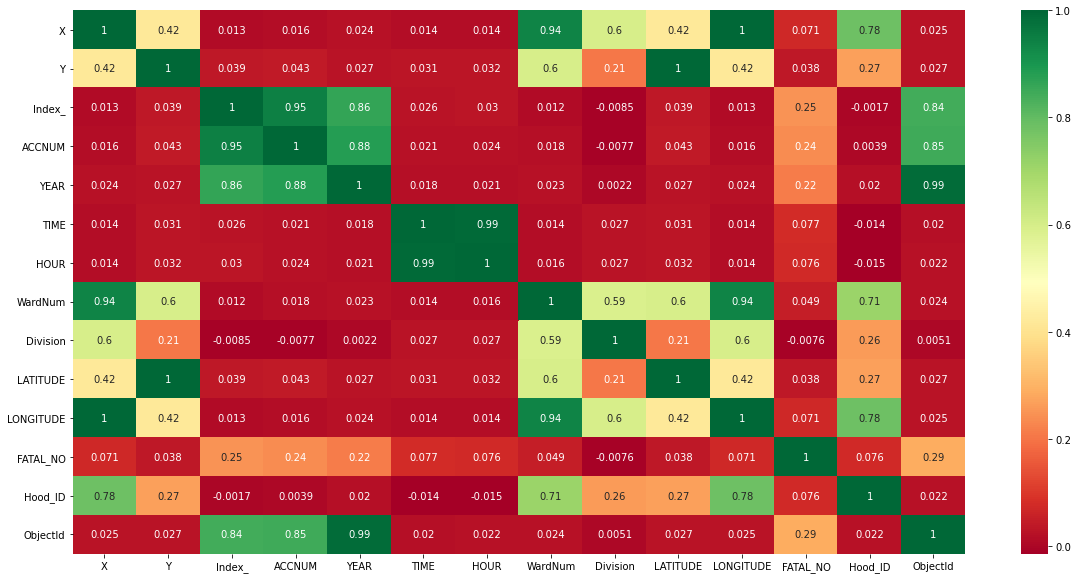

In [139]:
corrmat_df = df.corr()
highest_corr_vars_df = corrmat_df.index
plt.figure(figsize=(20,10))
g = sb.heatmap(df[highest_corr_vars_df].corr(),annot = True,cmap = "RdYlGn")

As we can see in the above, the initial "raw" dataset does not provide any correlations to our chosen variables as it has not yet been translated as numerical data. Unfortunately, These correlations don't tell us much about what we're looking for.

#### Correlation Matrix for New <i>df_class_aug5_dv_all</i> dataframe - Using Dummy Variables <font color = "red">Click to enlarge</font>

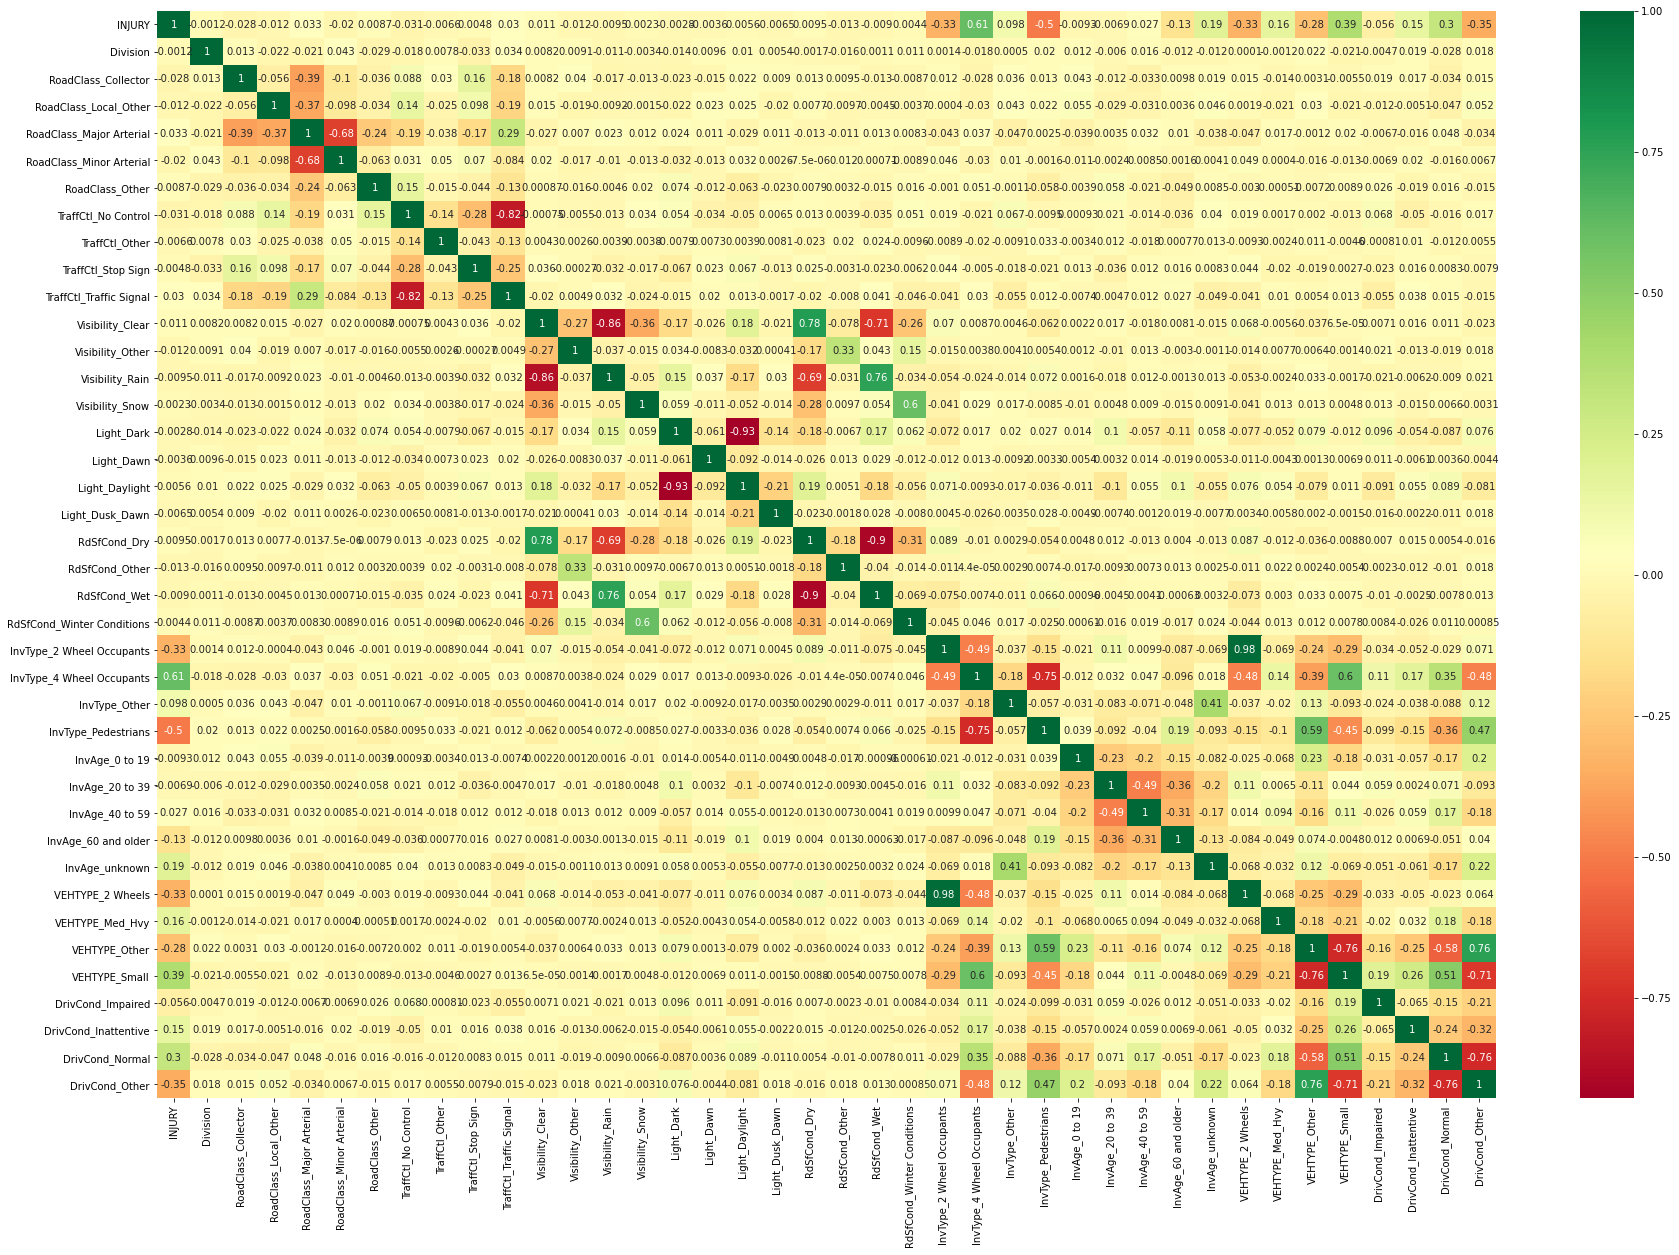

In [140]:
corrmat_df_class = df_class_aug5_dv_all.corr()
highest_corr_vars_df_class = corrmat_df_class.index
plt.figure(figsize=(30,20))
g = sb.heatmap(df_class_aug5_dv_all[highest_corr_vars_df_class].corr(),annot = True,cmap = "RdYlGn")

In analyzing the correlation matrix, there isn't much correlation in our features with the exception of the following:

<b>Positive Correlation between VEHTYPE and INVTYPE:</b>
There seems to be a good correlation between the Vehicle Type and Involvement Type. The strongest correlations were Invtype_4 Wheel Occupants & Vehtype_small of 0.6 and Invtype_2 Wheel Occupants & Vehtype_2 Wheel of 0.98. A correlation between the accident party's vehicle type and their involvement type is to be expected.

<b>Positive Correlation between RDSCFCOND and VISIBILITY: </b>
    There seems to be a good correlation between the Road Surface Condition and Visibility. The the strongest among them are Visibility_clear & Rdsfcond of 0.78 and Visibility_rain & Rdsfcond_rain of 0.76. This should be expected, as both of these features are based on the weather conditions of the accident. 

<b>Positive Correlation between INVTYPE & INJURY: </b>
    The correlation between the accident party's type of involvement has a good correlation with the severity of injury. This would make sense, as Pedestrians, Cyclists, and others with a high vulnerability score under "INVTYPE" are more likely to experience more severe injuries than those lower on the vulnerability scale. The strongest correlation was Invtype_4 Wheel Occupants & Injury of 0.61.
    
<b>Negative Correlation between RDSFCOND & VISIBILITY: </b>
The was a negative correlation between the visibility and road surface condition specifically, RdsfCond_wet & Visibility_clear of -0.71 which is interesting as the other possible combinations of RdsfCond and Visibility didn't show such negative correlations.

<b>Negative Correlation WITHIN each feature LIGHT & RDSFCOND:</b>
There were negative correlations within the Light and Road Rurface Condition features themselves which were expected, for example Light_dark & Light_day was -0.93 and Rdsfcond_Dry & Rdsfcond_Wet was -0.90.

<b>Negative Correlation WITHIN INVTYPE: </b>
There was also a negative correlation within the Involvement Type, specifically Invtype_pedstrians & Invtype_4 Wheel Occupants of -0.75 which makes sense since within the feature category there is no accident to report.

## <font color = "green"> Decision Tree Model 1 </font>
<font color = "green">For this model we are using <b>all</b> the features of interest as an intial review.</font>

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = mpl.rcParams['savefig.dpi'] = 300

In [142]:
X = df_class_aug5_dv_all.drop("INJURY", axis=1) # Features
y = df_class_aug5_dv_all["INJURY"]# Target variable

In [143]:
# Split the dataset into 70% training data and 30% of testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [144]:
# Train the model with the help of DecisionTreeClassifier class
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [145]:
# Next we make a prediction
y_pred = clf.predict(X_test)

In [146]:
# Get the accuracy score, confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1328  513]
 [ 527 1959]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1841
         1.0       0.79      0.79      0.79      2486

    accuracy                           0.76      4327
   macro avg       0.75      0.75      0.75      4327
weighted avg       0.76      0.76      0.76      4327

Accuracy: 0.7596487173561359


We see here based on the Classification Report and accuracy that this is not a bad model in predicting Fatal+Major Injury accidents with an accuacy of 76.1%. Let's try to improve on this in Decision Tree Model 2 below, by only selecting features that we know have some correlation with our target variable of INJURY.

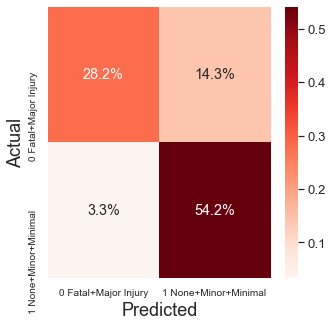

In [213]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5))
sb.set(font_scale=1.20)
labels = ['0 Fatal+Major Injury', '1 None+Minor+Minimal '] 
p=sns.heatmap(result/np.sum(result), annot=True, fmt='.1%', cmap='Reds', ax=ax)
p.set_xlabel("Predicted", fontsize = 18)
p.set_ylabel("Actual", fontsize = 18)
p.set_xticklabels(labels, fontsize = 10)
p.set_yticklabels(labels, fontsize = 10)
#p.set_title("Confusion Matrix of Fatal+Major Injury Accidents - Decision Tree Model 1", fontsize = 5)
plt.savefig("figure1.png")

## <font color = "green"> Decision Tree Model 2 </font>
<font color = "green"> For this model we are using <b>selected features</b> based on the correlation matrix analysis completed previously. We narrow the features based on only the most positive correlations. </font>
<font color = "green"> The selected features are <b>VISIBILITY, RDSFCOND, VEHTYPE, INVAGE, INVTYPE and DRIVCOND</b>.

In [148]:
df_class_select_dv_all = pd.concat([df_class_allfeatures, Visibility_dv_all, RdSfCond_dv_all, InvType_dv_all, InvAge_dv_all, Vehicle_dv_all, DrivCond_dv_all], axis=1)

In [149]:
# Drop feature columns from which dummy variables were created.
df_class_select_dv_all.drop(['TRAFFCTL','ROAD_CLASS', 'LIGHT', 'VISIBILITY', 'VEHTYPE', 'DRIVCOND','INVAGE','RDSFCOND','INVTYPE', 'Division'],axis=1,inplace=True)

In [150]:
df_class_select_dv_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14422 entries, 0 to 16092
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   INJURY                      14422 non-null  float64
 1   Visibility_Clear            14422 non-null  uint8  
 2   Visibility_Other            14422 non-null  uint8  
 3   Visibility_Rain             14422 non-null  uint8  
 4   Visibility_Snow             14422 non-null  uint8  
 5   RdSfCond_Dry                14422 non-null  uint8  
 6   RdSfCond_Other              14422 non-null  uint8  
 7   RdSfCond_Wet                14422 non-null  uint8  
 8   RdSfCond_Winter Conditions  14422 non-null  uint8  
 9   InvType_2 Wheel Occupants   14422 non-null  uint8  
 10  InvType_4 Wheel Occupants   14422 non-null  uint8  
 11  InvType_Other               14422 non-null  uint8  
 12  InvType_Pedestrians         14422 non-null  uint8  
 13  InvAge_0 to 19              144

Now we have a dataframe with ony our selected features based on our analysis of the correlation matrix using the dummy variables.

In [151]:
X = df_class_select_dv_all.drop("INJURY", axis=1) # Features
y = df_class_select_dv_all["INJURY"]# Target variable

In [152]:
# Split the dataset into 70% training data and 30% of testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [153]:
# Train the model with the help of DecisionTreeClassifier class
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train, y_train)

In [154]:
# Next we make a prediction
y_pred = clf2.predict(X_test)

In [155]:
# Get the accuracy score, confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1225  616]
 [ 146 2340]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76      1841
         1.0       0.79      0.94      0.86      2486

    accuracy                           0.82      4327
   macro avg       0.84      0.80      0.81      4327
weighted avg       0.83      0.82      0.82      4327

Accuracy: 0.8238964640628611


We can see here that our accuracy has increased from 76.1% to 82.3% from Decision Tree Model 1. Let's try to improve this by tuning the model using the DecisionTree parameters.

## <font color = "green"> Decision Tree Model 2 - Tuned</font>
<font color = "green"> For this model we are using the Decision Tree 2 and tuning it up.

In [156]:
# Tuning the model by using available parameters.
clf3 = DecisionTreeClassifier(max_depth=30, random_state=75, min_samples_leaf=9, criterion='gini')
clf3 = clf3.fit(X_train, y_train)

In [157]:
# Next we make a prediction
y_pred = clf3.predict(X_test)

In [158]:
# Get the accuracy score, confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1222  619]
 [ 141 2345]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76      1841
         1.0       0.79      0.94      0.86      2486

    accuracy                           0.82      4327
   macro avg       0.84      0.80      0.81      4327
weighted avg       0.84      0.82      0.82      4327

Accuracy: 0.8243586780679455


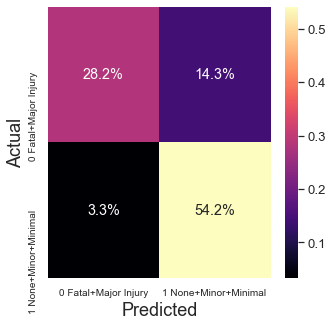

In [214]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5))
sb.set(font_scale=1.20)
labels = ['0 Fatal+Major Injury', '1 None+Minor+Minimal '] 
p=sns.heatmap(result/np.sum(result), annot=True, fmt='.1%', cmap='magma', ax=ax)
p.set_xlabel("Predicted", fontsize =18)
p.set_ylabel("Actual", fontsize = 18)
p.set_xticklabels(labels, fontsize = 10)
p.set_yticklabels(labels, fontsize = 10)
#p.set_title("Confusion Matrix of Fatal+Major Injury Accidents - Decision Tree Model 2-Tuned", fontsize = 10) 
plt.savefig("figure2.png")

We have a slight inprovement to the accuracy where it is now 82.4% vs 82.3% by using some parameters for the Decision Tree model. The Classification Report shows very little change with tuning this model with only a 1% increase in the prescision from fom 89% to 90% which indicates better prediction of Fatal+Major Injury accidents (labelled as 0). We also note  that the recall is the lowest value at 66% for Fatal+Major Injury accidents (labelled as 0) which means the fraction of positives that were correctly identified is only 66%. The Confusion Matrix shows that with tuning the TruePositive+TrueNegative has increased from 3563 to 3597 (34 data points) indicating that more data points were correctly classified by the model. However, we see that there was little other change in the FalsePositives or FalseNegatives; if we had seen a big increase in FalsePositives this would have been a concern since it is of value in understanding/evaluating the Fatal+Major Injury accidents rather than the other grouped accidents (None+Minor+Minimal labelled as 1). Overall, this is a good model and predicts Fatal+Major Injury accidents well.

## <font color = "green">Visual of Decision Tree Model 2 - Tuned</font>

In [160]:
FEATURE_NAMES = df_class_select_dv_all.columns[1:26]
FEATURE_NAMES

Index(['Visibility_Clear', 'Visibility_Other', 'Visibility_Rain',
       'Visibility_Snow', 'RdSfCond_Dry', 'RdSfCond_Other', 'RdSfCond_Wet',
       'RdSfCond_Winter Conditions', 'InvType_2 Wheel Occupants',
       'InvType_4 Wheel Occupants', 'InvType_Other', 'InvType_Pedestrians',
       'InvAge_0 to 19', 'InvAge_20 to 39', 'InvAge_40 to 59',
       'InvAge_60 and older', 'InvAge_unknown', 'VEHTYPE_2 Wheels',
       'VEHTYPE_Med_Hvy', 'VEHTYPE_Other', 'VEHTYPE_Small',
       'DrivCond_Impaired', 'DrivCond_Inattentive', 'DrivCond_Normal',
       'DrivCond_Other'],
      dtype='object')

In [161]:
from sklearn.tree import export_graphviz
export_graphviz(clf3, 'tree.dot', feature_names = FEATURE_NAMES)

In [162]:
! dot -Tpng tree.dot -o tree.png

In [163]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Decision Tree Model 2 - Tuned')

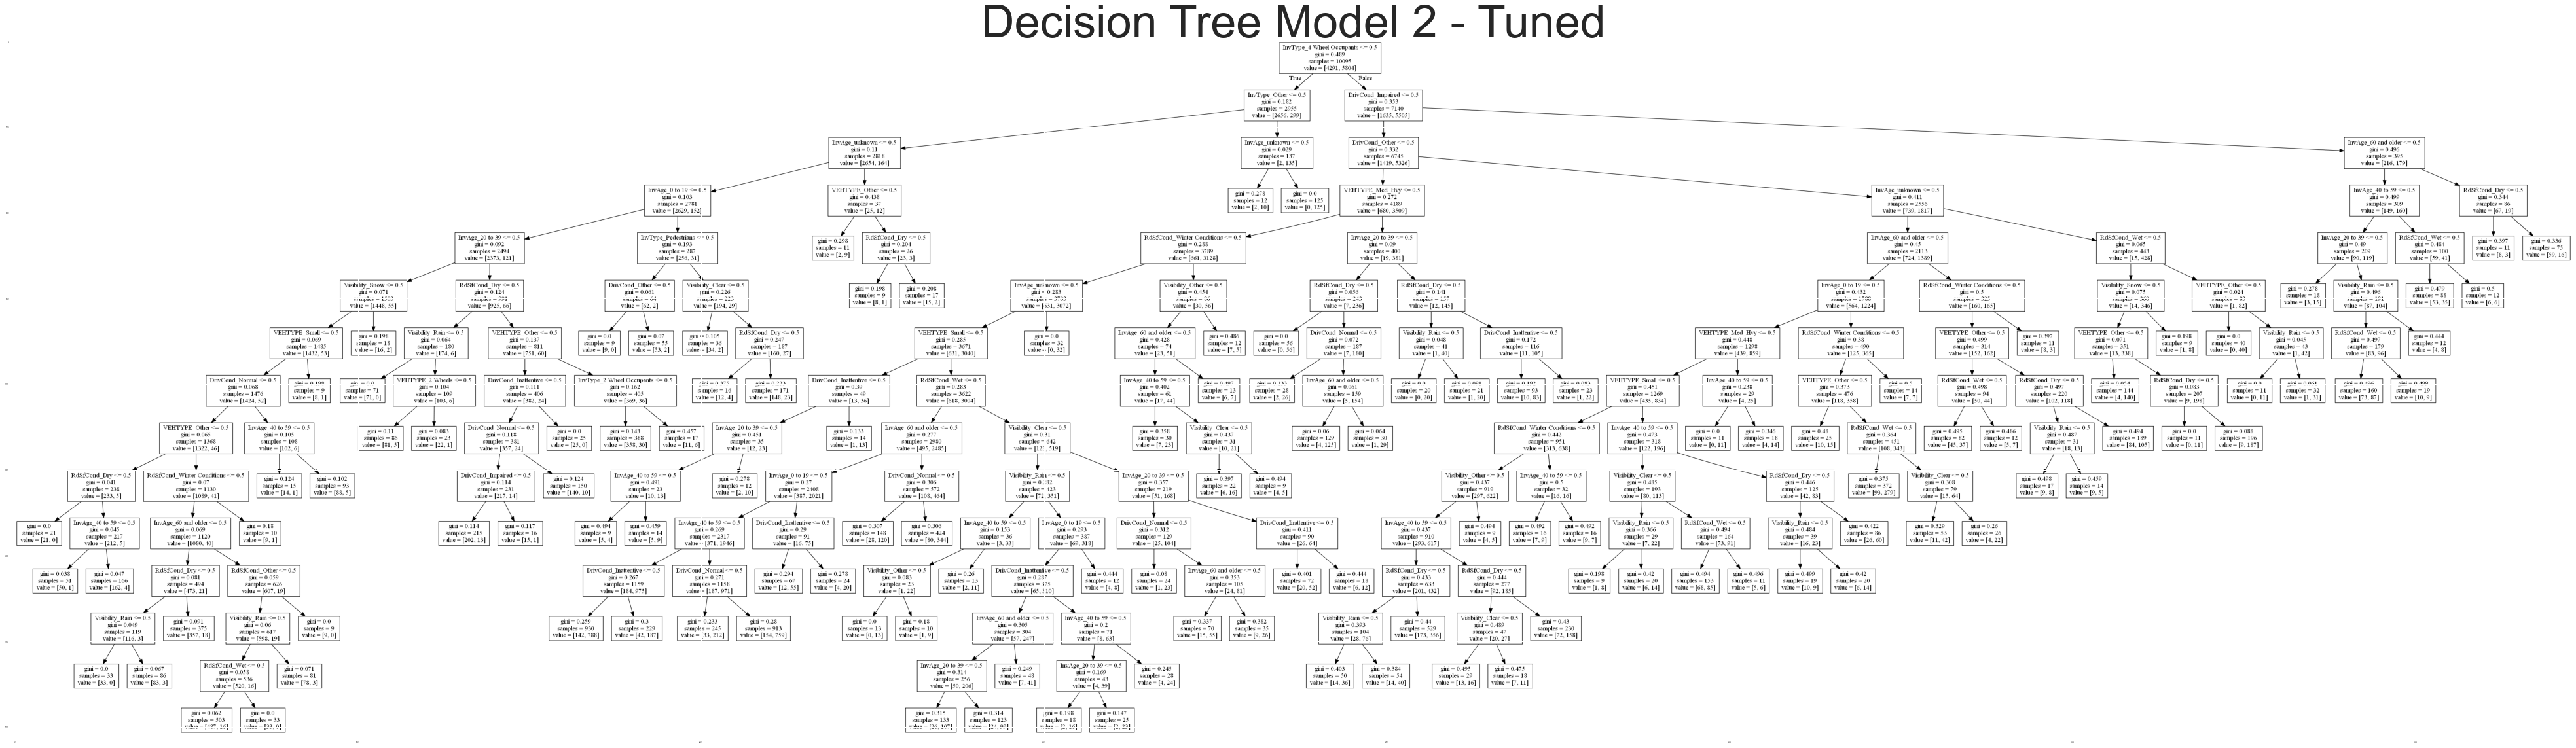

In [164]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (70, 70))
plt.imshow(img)
plt.title("Decision Tree Model 2 - Tuned", fontsize = 70) 

### <font color = "green">Click image to enlarge.</font>

## <font color = "blue"> Random Forest Model 1 </font> 
<font color = "blue">For this model we are using <b>all</b> the features of interest as an intial review.</font>

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [186]:
from sklearn.model_selection import KFold, cross_val_score

In [187]:
X = df_class_aug5_dv_all.drop("INJURY", axis=1) # Features
y = df_class_aug5_dv_all["INJURY"]# Target variable

In [188]:
# Split the dataset into 70% training data and 30% of testing data
X_tr, X_val, y_tr, y_val = train_test_split(X,y, test_size=0.3, random_state=1)

In [189]:
RandomForest = RandomForestClassifier(n_estimators=300, random_state = 1)

In [190]:
y_tr_array = np.ravel(y_tr)

In [191]:
RandomForest.fit(X_tr, y_tr_array)

RandomForestClassifier(n_estimators=300, random_state=1)

In [192]:
RandomForest_predict = RandomForest.predict(X_val)

In [193]:
ClassificationReport = classification_report(y_val, RandomForest_predict)
print(ClassificationReport)

              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      1841
         1.0       0.79      0.86      0.83      2486

    accuracy                           0.79      4327
   macro avg       0.79      0.78      0.78      4327
weighted avg       0.79      0.79      0.79      4327



In [194]:
CM = confusion_matrix(y_val, RandomForest_predict)
print("Confusion Matrix:")
print(CM)

Confusion Matrix:
[[1280  561]
 [ 339 2147]]


In [195]:
accuracy_score(y_val, RandomForest_predict)*100  

79.20036977120407

Text(0.5, 1.0, 'Confusion Matrix of Fatal+Major Injury Accidents - Random Forest Model 1')

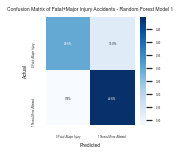

In [197]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(2,2))
sb.set(font_scale=.25)
labels = ['0 Fatal+Major Injury', '1 None+Minor+Minimal '] 
p=sns.heatmap(CM/np.sum(CM), annot=True, fmt='.1%', cmap='Blues')
p.set_xlabel("Predicted", fontsize = 5)
p.set_ylabel("Actual", fontsize = 5)
p.set_xticklabels(labels)
p.set_yticklabels(labels)
p.set_title("Confusion Matrix of Fatal+Major Injury Accidents - Random Forest Model 1", fontsize = 5) 

## <font color = "blue"> Random Forest Model 2 </font> 


<font color = "blue"> Similar to the Decision Tree model,we are using <b>selected features</b> based on the correlation matrix analysis completed previously. We narrow the features based on only the most positive correlations. </font>
<font color = "blue"> The selected features are <b>VISIBILITY, RDSFCOND, VEHTYPE, INVAGE, INVTYPE and DRIVCOND</b>.

In [248]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [249]:
X = df_class_select_dv_all.drop("INJURY", axis=1) # Features
y = df_class_select_dv_all["INJURY"]# Target variable

In [250]:
# Split the dataset into 70% training data and 30% of testing data
X_tr, X_val, y_tr, y_val = train_test_split(X,y, test_size=0.3, random_state=1)

In [251]:
RandomForest = RandomForestClassifier(n_estimators=300, random_state = 1)

In [252]:
y_tr_array = np.ravel(y_tr)

In [253]:
RandomForest.fit(X_tr, y_tr_array)

RandomForestClassifier(n_estimators=300, random_state=1)

In [254]:
RandomForest_predict = RandomForest.predict(X_val)

In [255]:
ClassificationReport = classification_report(y_val, RandomForest_predict)
print(ClassificationReport)

              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76      1841
         1.0       0.79      0.94      0.86      2486

    accuracy                           0.82      4327
   macro avg       0.84      0.80      0.81      4327
weighted avg       0.84      0.82      0.82      4327



In [256]:
CM2 = confusion_matrix(y_val, RandomForest_predict)
print("Confusion Matrix:")
print(CM2)

Confusion Matrix:
[[1221  620]
 [ 139 2347]]


In [257]:
accuracy_score(y_val, RandomForest_predict)*100  

82.45897850704877

Text(0.5, 1.0, 'Confusion Matrix of Fatal+Major Injury Accidents - Random Forest Model 2')

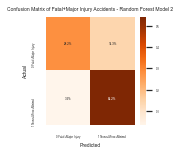

In [258]:
fig, ax = plt.subplots(figsize=(2,2))
sb.set(font_scale=.25)
labels = ['0 Fatal+Major Injury', '1 None+Minor+Minimal '] 
p=sns.heatmap(CM2/np.sum(CM2), annot=True, fmt='.1%', cmap='Oranges', ax=ax)
p.set_xlabel("Predicted", fontsize = 5)
p.set_ylabel("Actual", fontsize = 5)
p.set_xticklabels(labels)
p.set_yticklabels(labels)
p.set_title("Confusion Matrix of Fatal+Major Injury Accidents - Random Forest Model 2", fontsize = 5) 

After completing and running two Random Forest models, you can see that there was a slight improvement in the accuracy of the models. When we focused on the selected features the accuracy increased from 79.20% to 80.77%. Also when the precision between the models had increased slightly aswell, for fatal+Major which is labeled as 0 went from 79% to 83% and for the other group of accidents labeled as 1.0 increased just from 79% to 80%. Also from looking at the confusions matrixes for both models the percentages have increased.By doing an examination of the total data set and a selected few features, the model becomes improved and alot more accurate. In the end this model shows that there is a strong correlation for fatal+major injuries accidents.